In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import shap
import socket
import matplotlib.pyplot as plt
from tqdm import tqdm

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns
import os
import gc
import math
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [4]:
df = pd.read_csv("../data/raw/CIC_IoMT_2024_WiFi_MQTT_train.csv")

In [5]:
df.sample(5)

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
1592144,0.0,1.0,64.0,164482.520,164482.520,0,0.0,0.0,0.0,0.0,...,0.0,42.0,84697060.0,9.5,9.164,0.0,0.0,0.0,141.5,TCP_IP-DDoS-ICMP5_train
1132195,30185.0,17.0,64.0,20734.293,20734.293,0,0.0,0.0,0.0,0.0,...,0.0,50.0,84696860.0,9.5,10.000,0.0,0.0,0.0,141.5,TCP_IP-DDoS-UDP8_train
2803661,38725.0,17.0,64.0,26231.107,26231.107,0,0.0,0.0,0.0,0.0,...,0.0,50.0,84678860.0,9.5,10.000,0.0,0.0,0.0,141.5,TCP_IP-DoS-UDP3_train
4969548,54.0,6.0,64.0,0.000,0.000,0,0.0,1.0,0.0,0.0,...,0.0,54.0,84696280.0,9.5,10.390,0.0,0.0,0.0,141.5,TCP_IP-DDoS-SYN4_train
49967,21141.0,17.0,64.0,33468.547,33468.547,0,0.0,0.0,0.0,0.0,...,0.0,50.0,84696610.0,9.5,10.000,0.0,0.0,0.0,141.5,TCP_IP-DDoS-UDP2_train


In [6]:
df.shape

(7160831, 46)

In [7]:
df.describe()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7160831.0,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,...,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06,7.160831e+06
mean,2.958836e+04,8.042994e+00,6.474652e+01,1.523202e+04,1.523202e+04,0.0,5.079549e-03,1.587609e-01,3.862139e-02,2.240655e-02,...,6.083873e+01,6.405736e+00,6.084030e+01,8.468349e+07,9.499081e+00,1.044928e+01,9.047365e+00,2.535226e+03,9.148464e-02,1.414795e+02
std,2.762618e+05,6.292249e+00,8.405145e+00,3.950968e+04,3.950968e+04,0.0,3.411170e-02,3.388233e-01,1.371016e-01,9.713146e-02,...,8.809639e+01,3.917352e+01,8.787611e+01,1.788442e+07,8.446717e-01,3.169333e+00,5.538150e+01,2.045832e+04,2.327133e-01,2.174133e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,-1.282061e+00,1.000000e+00,9.164000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.400000e+01,1.160000e+00,6.400000e+01,6.685014e+00,6.685014e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.234000e+01,0.000000e+00,4.260000e+01,8.467888e+07,9.500000e+00,9.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.415000e+02
50%,1.080000e+02,6.000000e+00,6.400000e+01,1.452887e+02,1.452887e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.469641e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415000e+02
75%,1.958050e+04,1.700000e+01,6.400000e+01,1.914681e+04,1.914681e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.469686e+07,9.500000e+00,1.039000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415000e+02
max,9.895636e+06,1.700000e+01,2.550000e+02,2.097152e+06,2.097152e+06,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.514000e+03,7.210000e+02,1.514000e+03,1.694694e+08,1.500000e+01,5.503000e+01,1.020000e+03,5.204379e+05,1.000000e+00,2.446000e+02


In [8]:
df['label'].unique()

array(['TCP_IP-DDoS-UDP2_train', 'TCP_IP-DDoS-UDP4_train',
       'TCP_IP-DDoS-ICMP6_train', 'TCP_IP-DoS-SYN2_train',
       'TCP_IP-DDoS-ICMP3_train', 'TCP_IP-DDoS-ICMP1_train',
       'TCP_IP-DDoS-UDP8_train', 'TCP_IP-DDoS-UDP1_train',
       'MQTT-DoS-Connect_Flood_train', 'MQTT-DDoS-Publish_Flood_train',
       'TCP_IP-DDoS-ICMP5_train', 'TCP_IP-DDoS-SYN3_train',
       'MQTT-DDoS-Connect_Flood_train', 'TCP_IP-DDoS-UDP3_train',
       'TCP_IP-DDoS-TCP2_train', 'MQTT-DoS-Publish_Flood_train',
       'TCP_IP-DoS-TCP3_train', 'TCP_IP-DoS-UDP3_train',
       'TCP_IP-DoS-ICMP3_train', 'TCP_IP-DDoS-SYN2_train',
       'TCP_IP-DDoS-UDP6_train', 'TCP_IP-DDoS-ICMP2_train',
       'Benign_train', 'TCP_IP-DDoS-ICMP7_train', 'TCP_IP-DoS-SYN1_train',
       'TCP_IP-DoS-SYN4_train', 'TCP_IP-DDoS-TCP4_train',
       'Recon-OS_Scan_train', 'Recon-Ping_Sweep_train',
       'TCP_IP-DDoS-SYN1_train', 'Recon-VulScan_train',
       'TCP_IP-DDoS-ICMP8_train', 'TCP_IP-DoS-TCP1_train',
       'TCP_IP-DoS-

In [9]:
import pandas as pd
label_mapping = {
    'Benign': ['Benign_train'],
    
    'Spoofing': ['ARP_Spoofing_train'],

    'Reconnaissance': [
        'Recon-OS_Scan_train',
        'Recon-Ping_Sweep_train',
        'Recon-VulScan_train',
        'Recon-Port_Scan_train'
    ],
    
    'MQTT': [
        'MQTT-Malformed_Data_train',
        'MQTT-DoS-Connect_Flood_train',
        'MQTT-DDoS-Publish_Flood_train',
        'MQTT-DoS-Publish_Flood_train',
        'MQTT-DDoS-Connect_Flood_train'
    ],

    'DoS': [
        'TCP_IP-DoS-TCP1_train', 'TCP_IP-DoS-TCP2_train', 'TCP_IP-DoS-TCP3_train', 'TCP_IP-DoS-TCP4_train',
        'TCP_IP-DoS-UDP1_train', 'TCP_IP-DoS-UDP2_train', 'TCP_IP-DoS-UDP3_train', 'TCP_IP-DoS-UDP4_train',
        'TCP_IP-DoS-ICMP1_train', 'TCP_IP-DoS-ICMP2_train', 'TCP_IP-DoS-ICMP3_train', 'TCP_IP-DoS-ICMP4_train',
        'TCP_IP-DoS-SYN1_train', 'TCP_IP-DoS-SYN2_train', 'TCP_IP-DoS-SYN3_train', 'TCP_IP-DoS-SYN4_train'
    ],

    'DDoS': [
        'TCP_IP-DDoS-TCP1_train', 'TCP_IP-DDoS-TCP2_train', 'TCP_IP-DDoS-TCP3_train', 'TCP_IP-DDoS-TCP4_train',
        'TCP_IP-DDoS-UDP1_train', 'TCP_IP-DDoS-UDP2_train', 'TCP_IP-DDoS-UDP3_train', 'TCP_IP-DDoS-UDP4_train',
        'TCP_IP-DDoS-UDP5_train', 'TCP_IP-DDoS-UDP6_train', 'TCP_IP-DDoS-UDP7_train', 'TCP_IP-DDoS-UDP8_train',
        'TCP_IP-DDoS-ICMP1_train', 'TCP_IP-DDoS-ICMP2_train', 'TCP_IP-DDoS-ICMP3_train', 'TCP_IP-DDoS-ICMP4_train',
        'TCP_IP-DDoS-ICMP5_train', 'TCP_IP-DDoS-ICMP6_train', 'TCP_IP-DDoS-ICMP7_train', 'TCP_IP-DDoS-ICMP8_train',
        'TCP_IP-DDoS-SYN1_train', 'TCP_IP-DDoS-SYN2_train', 'TCP_IP-DDoS-SYN3_train', 'TCP_IP-DDoS-SYN4_train'
    ]
}

In [10]:
def map_category(label):
    for parent, sub_labels in label_mapping.items():
        if label in sub_labels:
            return parent
    return 'Unknown'
df['SuperClass'] = df['label'].apply(map_category)

In [11]:
grouped = df.groupby(['SuperClass', 'label']).size().reset_index(name='Records')
total = len(df)
grouped['Percentage'] = (grouped['Records'] / total) * 100

summary = grouped.groupby('SuperClass')['Records'].sum().reset_index()
summary['Percentage'] = (summary['Records'] / total) * 100

print("Hierarchical Breakdown:")
display(grouped.sort_values(['SuperClass', 'Records'], ascending=[True, False]).head(20))

print("Category Summary:")
display(summary)

Hierarchical Breakdown:


,SuperClass,label,Records,Percentage
0,Benign,Benign_train,192732,2.691475
18,DDoS,TCP_IP-DDoS-UDP2_train,207295,2.894846
19,DDoS,TCP_IP-DDoS-UDP3_train,206604,2.885196
20,DDoS,TCP_IP-DDoS-UDP4_train,206343,2.881551
17,DDoS,TCP_IP-DDoS-UDP1_train,206170,2.879135
21,DDoS,TCP_IP-DDoS-UDP5_train,205507,2.869876
24,DDoS,TCP_IP-DDoS-UDP8_train,204105,2.850298
15,DDoS,TCP_IP-DDoS-TCP3_train,204075,2.849879
10,DDoS,TCP_IP-DDoS-SYN2_train,203669,2.844209
13,DDoS,TCP_IP-DDoS-TCP1_train,202311,2.825245


Category Summary:


,SuperClass,Records,Percentage
0,Benign,192732,2.691475
1,DDoS,4779859,66.750060
2,DoS,1805529,25.213959
3,MQTT,262938,3.671892
4,Reconnaissance,103726,1.448519
5,Spoofing,16047,0.224094


In [12]:
df.isnull().sum()

Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
SuperClass         0
dtype: int64

Coping with class imbalance severity here..

Preprocessing pipeline:

In [13]:
ID_COLS = ['label', 'SuperClass']

In [14]:
DROP_COLS = ['Boot_Time_with_date', 'RTime', 'SrcAddr', 'DstAddr', 'SrcMac', 'DstMac', 'IMEI']

In [15]:
RATE_COLS = ['Rate', 'Srate', 'Drate'] 

In [16]:
TARGET_COUNTS = {
    'DDoS': 500_000,
    'DoS':  500_000,
    'Benign': 300_000,
    'MQTT': 300_000,
    'Reconnaissance': 200_000,
    'Spoofing': 200_000
}

In [17]:
cols_to_drop = [c for c in DROP_COLS if c in df.columns]
if cols_to_drop:
    print("Dropping ID/time columns:", cols_to_drop)
    df = df.drop(columns=cols_to_drop)

In [18]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label,SuperClass
0,683.50,17.00,64.0,553148.440,553148.440,0,0.0,0.0,0.0,0.00,...,50.00,101635944.0,9.5,10.00,0.000,0.000000,0.00,141.5,TCP_IP-DDoS-UDP2_train,DDoS
1,1745.92,16.12,64.0,29919.545,29919.545,0,0.0,0.0,0.0,0.04,...,52.28,84696616.0,9.5,10.05,2.152,11.785338,0.23,141.5,TCP_IP-DDoS-UDP2_train,DDoS
2,2830.36,15.79,64.0,27075.605,27075.605,0,0.0,0.0,0.0,0.06,...,53.25,84696616.0,9.5,10.35,10.555,113.675460,0.53,141.5,TCP_IP-DDoS-UDP2_train,DDoS
3,4087.50,16.89,64.0,19660.156,19660.156,0,0.0,0.0,0.0,0.00,...,50.16,84696616.0,9.5,10.03,1.236,4.490081,0.18,141.5,TCP_IP-DDoS-UDP2_train,DDoS
4,3916.00,17.00,64.0,270322.780,270322.780,0,0.0,0.0,0.0,0.00,...,50.00,84696616.0,9.5,10.00,0.000,0.000000,0.00,141.5,TCP_IP-DDoS-UDP2_train,DDoS


In [19]:
df['SuperClass'].value_counts()

SuperClass
DDoS              4779859
DoS               1805529
MQTT               262938
Benign             192732
Reconnaissance     103726
Spoofing            16047
Name: count, dtype: int64

In [20]:
feature_cols = [c for c in df.columns if c not in ID_COLS]
print(f"Feature count: {len(feature_cols)}")

X_raw = df[feature_cols].copy()
y_raw = df['SuperClass'].copy()

Feature count: 45


In [21]:
non_numeric = [c for c in X_raw.columns if not np.issubdtype(X_raw[c].dtype, np.number)]
if non_numeric:
    print("Non-numeric columns detected - converting to numeric (if possible) or dropping:", non_numeric)
    for c in non_numeric:
        X_raw[c] = pd.to_numeric(X_raw[c], errors='coerce')
    non_numeric_after = [c for c in X_raw.columns if not np.issubdtype(X_raw[c].dtype, np.number)]
    if non_numeric_after:
        print("Dropping columns still non-numeric:", non_numeric_after)
        X_raw = X_raw.drop(columns=non_numeric_after)

In [22]:
rate_cols_present = [c for c in RATE_COLS if c in X_raw.columns]
if rate_cols_present:
    print("Applying MinMax normalization to rate cols:", rate_cols_present)
    mms = MinMaxScaler()
    X_raw[rate_cols_present] = mms.fit_transform(X_raw[rate_cols_present])

Applying MinMax normalization to rate cols: ['Rate', 'Srate', 'Drate']


In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
del X_raw
gc.collect()

10

In [24]:
X_scaled.shape

(7160831, 45)

In [25]:
y_raw.value_counts()

SuperClass
DDoS              4779859
DoS               1805529
MQTT               262938
Benign             192732
Reconnaissance     103726
Spoofing            16047
Name: count, dtype: int64

In [26]:
X_scaled.shape

(7160831, 45)

In [27]:
y_raw.shape

(7160831,)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_raw, test_size=0.2, stratify=y_raw, random_state=42
)

In [29]:
X_train.shape

(5728664, 45)

In [30]:
import numpy as np
import pandas as pd
from collections import OrderedDict

# ==========================
# USER PARAMETERS
# ==========================
TOTAL_N = 500_000            # choose 100k / 200k / 500k etc.
RATIO = OrderedDict([        # SuperClass order must match your SuperClass unique list
    ('DDoS', 4),
    ('DoS',  3),
    ('Benign', 2),
    ('MQTT', 1),
    ('Reconnaissance', 1),
    ('Spoofing', 1)
])
RANDOM_STATE = 42
MODE = 'resample'   # 'downsample' or 'resample' or 'smote' (smote requires imblearn & extra coding)

# ==========================
# CHECKS
# ==========================
assert 'SuperClass' in df.columns, "df must have a 'SuperClass' column"
np.random.seed(RANDOM_STATE)

# compute target counts from ratio
ratio_vals = np.array(list(RATIO.values()), dtype=float)
ratio_sum = ratio_vals.sum()
proportions = ratio_vals / ratio_sum
target_counts = (proportions * TOTAL_N).astype(int)

target_map = dict(zip(RATIO.keys(), target_counts))
print("Target counts (approx):")
for k,v in target_map.items():
    print(f"  {k}: {v:,}")

# actual availability
avail = df['SuperClass'].value_counts().to_dict()
print("\nAvailable counts:")
for k in RATIO.keys():
    print(f"  {k}: {avail.get(k,0):,}")

# ==========================
# Sampling function
# ==========================
def create_subset(df, target_map, mode='resample', random_state=42):
    parts = []
    rng = np.random.RandomState(random_state)
    for cls, tgt in target_map.items():
        cls_df = df[df['SuperClass'] == cls]
        n_avail = len(cls_df)
        if mode == 'downsample':
            # only downsample if more than target; else keep all available
            if n_avail > tgt:
                sampled = cls_df.sample(n=tgt, random_state=rng)
            else:
                sampled = cls_df.copy()   # keep as is; you may choose to upsample elsewhere
        elif mode == 'resample':
            # if available < target, sample with replacement
            replace = n_avail < tgt
            sampled = cls_df.sample(n=tgt, replace=replace, random_state=rng)
        else:
            raise ValueError("Unsupported mode. use 'downsample' or 'resample'")
        parts.append(sampled)
    subset_df = pd.concat(parts).sample(frac=1.0, random_state=rng).reset_index(drop=True)
    return subset_df

subset_df = create_subset(df, target_map, mode=MODE, random_state=RANDOM_STATE)
print("\nSubset created. New counts:")
print(subset_df['SuperClass'].value_counts())


Target counts (approx):
  DDoS: 166,666
  DoS: 125,000
  Benign: 83,333
  MQTT: 41,666
  Reconnaissance: 41,666
  Spoofing: 41,666

Available counts:
  DDoS: 4,779,859
  DoS: 1,805,529
  Benign: 192,732
  MQTT: 262,938
  Reconnaissance: 103,726
  Spoofing: 16,047

Subset created. New counts:
SuperClass
DDoS              166666
DoS               125000
Benign             83333
Reconnaissance     41666
Spoofing           41666
MQTT               41666
Name: count, dtype: int64


In [31]:
X = subset_df.drop(columns=['label','SuperClass'], errors='ignore')
y = subset_df['SuperClass']
le = LabelEncoder()
y_enc = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, stratify=y_enc, random_state=42)

rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

                precision    recall  f1-score   support

        Benign       0.99      0.99      0.99     16667
          DDoS       1.00      1.00      1.00     33334
           DoS       1.00      1.00      1.00     25000
          MQTT       1.00      0.99      1.00      8333
Reconnaissance       1.00      0.97      0.99      8333
      Spoofing       0.97      0.99      0.98      8333

      accuracy                           0.99    100000
     macro avg       0.99      0.99      0.99    100000
  weighted avg       0.99      0.99      0.99    100000



In [32]:
# Combine features and labels
df_combined = pd.concat([X, y], axis=1)

df_combined = df_combined.drop_duplicates()

X_subset = df_combined.drop("SuperClass", axis=1)
y_subset = df_combined["SuperClass"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, stratify=y_subset, test_size=0.2, random_state=42
)


In [33]:
print(X_train.duplicated().sum(), X_test.duplicated().sum())

0 0


In [34]:
X_train.shape

(318286, 45)

In [35]:
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

                precision    recall  f1-score   support

        Benign       0.98      0.99      0.98     16666
          DDoS       1.00      1.00      1.00     23673
           DoS       1.00      1.00      1.00     20291
          MQTT       1.00      0.99      1.00      8333
Reconnaissance       0.99      0.97      0.98      7658
      Spoofing       0.93      0.91      0.92      2951

      accuracy                           0.99     79572
     macro avg       0.98      0.98      0.98     79572
  weighted avg       0.99      0.99      0.99     79572



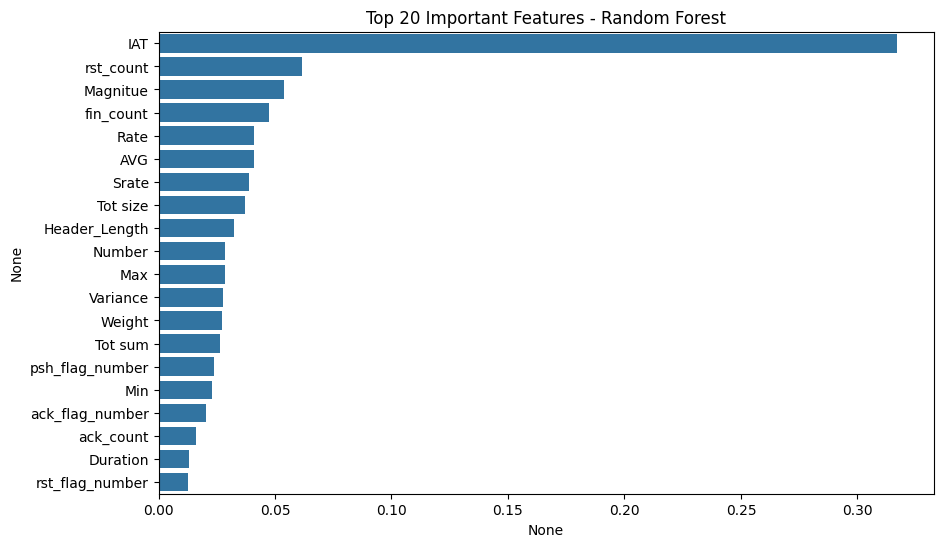

In [36]:
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:20], y=feat_imp.index[:20])
plt.title("Top 20 Important Features - Random Forest")
plt.show()

XGBoost:

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    n_jobs=4
)


1D CNN:

In [38]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
num_classes = len(le.classes_)

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = X_train_scaled[..., np.newaxis]
X_test_scaled = X_test_scaled[..., np.newaxis]

In [42]:
X_train_scaled.shape

(318286, 45, 1)

In [44]:
onedcnn_model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    layers.BatchNormalization(),
    layers.Conv1D(128, 3, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

onedcnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

onedcnn_model.summary()

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 43, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 43, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 41, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,502 (166.02 KB)

 Trainable params: 42,374 (165.52 KB)

 Non-trainable params: 128 (512.00 B)

In [45]:
history_cnn = onedcnn_model.fit(
    X_train_scaled, y_train_enc,
    epochs=15,
    batch_size=512,
    validation_data=(X_test_scaled, y_test_enc),
    verbose=1
)

Epoch 1/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7017 - loss: 0.6174 - val_accuracy: 0.7590 - val_loss: 0.4754
Epoch 2/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7578 - loss: 0.4688 - val_accuracy: 0.7716 - val_loss: 0.4335
Epoch 3/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7644 - loss: 0.4499 - val_accuracy: 0.7698 - val_loss: 0.4345
Epoch 4/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7701 - loss: 0.4385 - val_accuracy: 0.7852 - val_loss: 0.4182
Epoch 5/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7741 - loss: 0.4309 - val_accuracy: 0.7819 - val_loss: 0.4131
Epoch 6/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7761 - loss: 0.4262 - val_accuracy: 0.7826 - val_loss: 0.4118
Epoch 7/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7779 - loss: 0.4206 - val_accuracy: 0.7849 - val_loss: 0.4090
Epoch 8/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7780 - loss: 0.4182 - val_accu

In [46]:
rcl_model = models.Sequential([
    layers.Conv1D(64, 3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    layers.BatchNormalization(),
    layers.Conv1D(128, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.LSTM(64, return_sequences=False),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes, activation='softmax')
])

rcl_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

rcl_model.summary()

d:\Prog\iomt-anomalyze\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 43, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 43, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 41, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 20, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,718 (327.02 KB)

 Trainable params: 83,590 (326.52 KB)

 Non-trainable params: 128 (512.00 B)

In [47]:
history_rcl = rcl_model.fit(
    X_train_scaled, y_train_enc,
    epochs=15,
    batch_size=512,
    validation_data=(X_test_scaled, y_test_enc),
    verbose=1
)

Epoch 1/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.7356 - loss: 0.5115 - val_accuracy: 0.7821 - val_loss: 0.4272
Epoch 2/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7842 - loss: 0.4165 - val_accuracy: 0.7887 - val_loss: 0.4021
Epoch 3/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7902 - loss: 0.4026 - val_accuracy: 0.7928 - val_loss: 0.3931
Epoch 4/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7946 - loss: 0.3921 - val_accuracy: 0.7996 - val_loss: 0.3834
Epoch 5/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7978 - loss: 0.3870 - val_accuracy: 0.7973 - val_loss: 0.3824
Epoch 6/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7986 - loss: 0.3838 - val_accuracy: 0.7958 - val_loss: 0.3818
Epoch 7/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.8000 - loss: 0.3800 - val_accuracy: 0.7992 - val_loss: 0.3789
Epoch 8/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.8024 - loss: 0.3766 - 

In [48]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Add

input_layer = layers.Input(shape=(X_train_scaled.shape[1], 1))
x = layers.Conv1D(64, 3, activation='relu', padding='same')(input_layer)
x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(2)(x)

# Recurrent block
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)

# Self-Attention block
attn_output = MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
attn_output = Add()([x, attn_output])
x = LayerNormalization()(attn_output)

x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.4)(x)
output = layers.Dense(num_classes, activation='softmax')(x)

rcl_attention_model = models.Model(inputs=input_layer, outputs=output)

rcl_attention_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

rcl_attention_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 45, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 45, 64)    │        256 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 45, 128)   │     24,704 │ conv1d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 22, 128)   │          0 │ conv1d_5[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 22, 128)   │     98,816 │ max_pooling1d_1[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 22, 128)   │    131,968 │ bidirectional[0]… │
│ (MultiHeadAttentio… │                   │            │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 22, 128)   │          0 │ bidirectional[0]… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 22, 128)   │        256 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     16,512 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 6)         │        774 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 273,286 (1.04 MB)

 Trainable params: 273,286 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history_rcla = rcl_attention_model.fit(
    X_train_scaled, y_train_enc,
    epochs=15,
    batch_size=512,
    validation_data=(X_test_scaled, y_test_enc),
    verbose=1
)


Epoch 1/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 70s 113ms/step - accuracy: 0.7929 - loss: 0.3926 - val_accuracy: 0.7932 - val_loss: 0.3868
Epoch 2/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 94s 152ms/step - accuracy: 0.7949 - loss: 0.3884 - val_accuracy: 0.7991 - val_loss: 0.3827
Epoch 3/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 208s 334ms/step - accuracy: 0.7974 - loss: 0.3834 - val_accuracy: 0.7984 - val_loss: 0.3766
Epoch 4/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.7993 - loss: 0.3802 - val_accuracy: 0.7984 - val_loss: 0.3750
Epoch 5/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 71s 115ms/step - accuracy: 0.8013 - loss: 0.3781 - val_accuracy: 0.8007 - val_loss: 0.3732
Epoch 6/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.8011 - loss: 0.3762 - val_accuracy: 0.7983 - val_loss: 0.3806
Epoch 7/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 70s 112ms/step - accuracy: 0.8028 - loss: 0.3731 - val_accuracy: 0.7995 - val_loss: 0.3718
Epoch 8/15
622/622 ━━━━━━━━━━━━━━━━━━━━ 71s 114ms/step - accuracy: 0.8054 - loss: 

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
from tensorflow.keras.layers import (
    Input, Conv1D, BatchNormalization, Activation, Add, MaxPooling1D,
    GlobalAveragePooling1D, Dense, Dropout, MultiHeadAttention, LayerNormalization,
    Bidirectional, LSTM
)
class PositionalEncoding(layers.Layer):
    def __init__(self, maxlen, d_model):
        super(PositionalEncoding, self).__init__()
        pos = np.arange(maxlen)[:, np.newaxis]
        i = np.arange(d_model)[np.newaxis, :]
        angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
        angle_rads = pos * angle_rates
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        self.pos_encoding = tf.constant(angle_rads[np.newaxis, ...], dtype=tf.float32)

    def call(self, x):
        seq_len = tf.shape(x)[1]
        # Use tf.slice instead of numpy slicing
        pos_encoding = tf.slice(self.pos_encoding, [0, 0, 0], [1, seq_len, -1])
        return x + pos_encoding
def residual_block(x, filters, kernel_size=3):
    shortcut = x
    x = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv1D(filters, kernel_size, padding='same', activation=None)(x)
    x = BatchNormalization()(x)

    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Conv1D(filters, 1, padding='same')(shortcut)
    x = Add()([shortcut, x])
    x = Activation('relu')(x)
    return x


def build_advanced_rcl_attention(input_shape, num_classes, maxlen=None):
    inp = Input(shape=input_shape)
    if maxlen:
        x = PositionalEncoding(maxlen, input_shape[-1])(inp)
    else:
        x = inp

    x = residual_block(x, 64)
    x = residual_block(x, 128)
    x = MaxPooling1D(2)(x)

    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    attn_out = MultiHeadAttention(num_heads=4, key_dim=64, dropout=0.2)(x, x)
    x = Add()([x, attn_out])
    x = LayerNormalization()(x)

    x = GlobalAveragePooling1D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    out = Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=inp, outputs=out)
    return model


input_shape = (X_train_scaled.shape[1], 1)
num_classes = len(le.classes_)
rclnet_attn_pro = build_advanced_rcl_attention(
    input_shape=input_shape,
    num_classes=num_classes,
    maxlen=X_train_scaled.shape[1]
)
rclnet_attn_pro.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

rclnet_attn_pro.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 45, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encodin… │ (None, 45, 1)     │          0 │ input_layer_5[0]… │
│ (PositionalEncodin… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 45, 64)    │        256 │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 64)    │        256 │ conv1d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 45, 64)    │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 45, 64)    │     12,352 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 45, 64)    │        128 │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 64)    │        256 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 45, 64)    │          0 │ conv1d_8[0][0],   │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 45, 64)    │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 45, 128)   │     24,704 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 128)   │        512 │ conv1d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 45, 128)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 45, 128)   │     49,280 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 45, 128)   │      8,320 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 45, 128)   │        512 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 45, 128)   │          0 │ conv1d_11[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 45, 128)   │          0 │ add_2[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 22, 128)   │          0 │ activation_3[0][

 Total params: 362,182 (1.38 MB)

 Trainable params: 361,414 (1.38 MB)

 Non-trainable params: 768 (3.00 KB)

In [54]:
history_pro = rclnet_attn_pro.fit(
    X_train_scaled, y_train_enc,
    validation_data=(X_test_scaled, y_test_enc),
    epochs=25,
    batch_size=256,
    verbose=1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
)

Epoch 1/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 88s 68ms/step - accuracy: 0.7631 - loss: 0.4480 - val_accuracy: 0.7879 - val_loss: 0.4032 - learning_rate: 0.0010
Epoch 2/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.7889 - loss: 0.3986 - val_accuracy: 0.7922 - val_loss: 0.3883 - learning_rate: 0.0010
Epoch 3/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.7956 - loss: 0.3868 - val_accuracy: 0.7799 - val_loss: 0.4019 - learning_rate: 0.0010
Epoch 4/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 165s 133ms/step - accuracy: 0.7979 - loss: 0.3816 - val_accuracy: 0.8032 - val_loss: 0.3754 - learning_rate: 0.0010
Epoch 5/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 131s 105ms/step - accuracy: 0.7989 - loss: 0.3778 - val_accuracy: 0.8037 - val_loss: 0.3727 - learning_rate: 0.0010
Epoch 6/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 169s 136ms/step - accuracy: 0.8009 - loss: 0.3743 - val_accuracy: 0.7953 - val_loss: 0.3806 - learning_rate: 0.0010
Epoch 7/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 91s 73ms/step - 

In [56]:
models_dict = {
    "1D CNN": onedcnn_model,
    "RCLNet": rcl_model,
    "RCLNet + Attention": rcl_attention_model,
    "Adv. RCLNet + SelfAttenPE": rclnet_attn_pro,
}

for name, m in models_dict.items():
    y_pred = np.argmax(m.predict(X_test_scaled), axis=1)
    print(f"\n=== {name} ===")
    print(classification_report(y_test_enc, y_pred, target_names=le.classes_))

2487/2487 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

=== 1D CNN ===
                precision    recall  f1-score   support

        Benign       0.91      0.97      0.94     16666
          DDoS       0.79      0.53      0.63     23673
           DoS       0.60      0.83      0.70     20291
          MQTT       1.00      0.98      0.99      8333
Reconnaissance       0.99      0.91      0.95      7658
      Spoofing       0.70      0.61      0.65      2951

      accuracy                           0.79     79572
     macro avg       0.83      0.81      0.81     79572
  weighted avg       0.81      0.79      0.78     79572

2487/2487 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step

=== RCLNet ===
                precision    recall  f1-score   support

        Benign       0.93      0.96      0.95     16666
          DDoS       0.73      0.72      0.73     23673
           DoS       0.68      0.69      0.68     20291
          MQTT       1.00      0.99      0.99      8333
Reconnaissance       0.99      0.92   

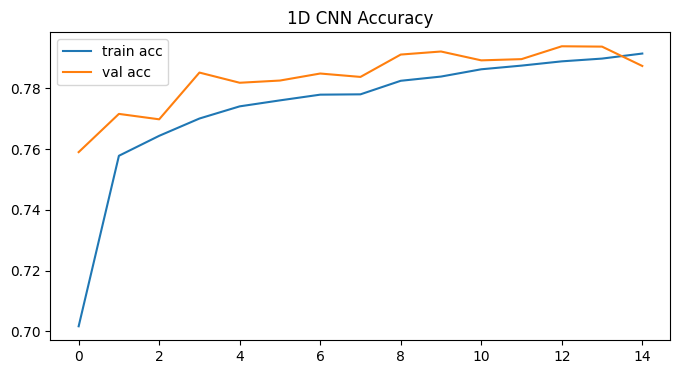

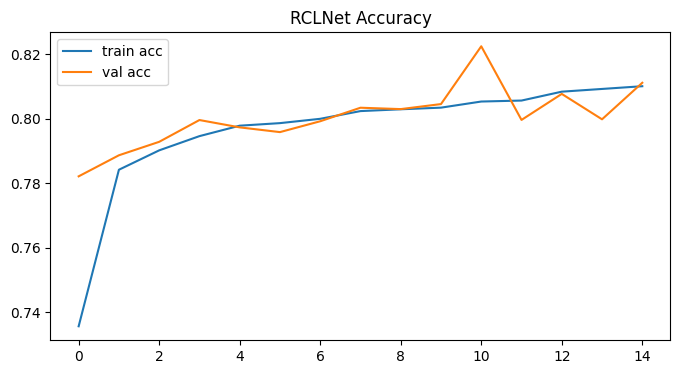

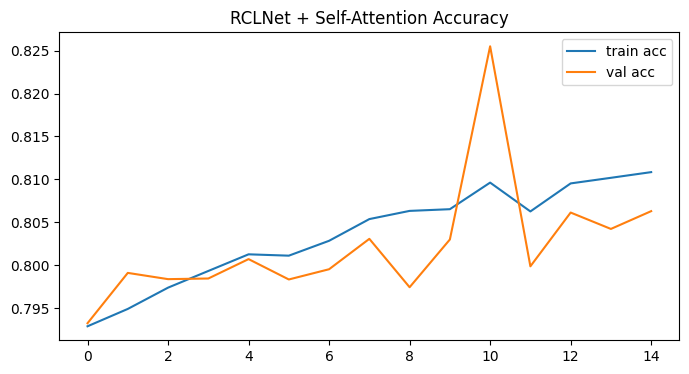

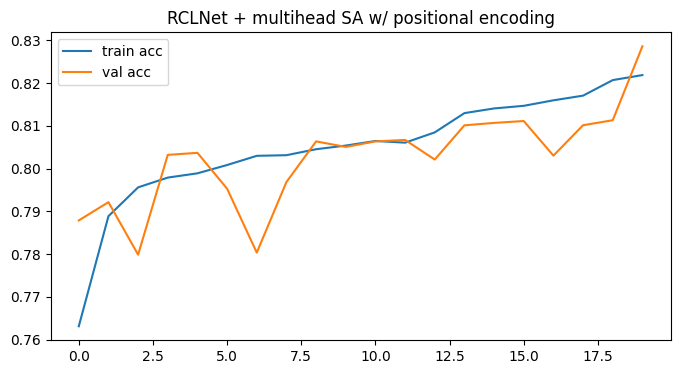

In [59]:
import matplotlib.pyplot as plt

def plot_history(hist, title):
    plt.figure(figsize=(8,4))
    plt.plot(hist.history['accuracy'], label='train acc')
    plt.plot(hist.history['val_accuracy'], label='val acc')
    plt.title(title)
    plt.legend()
    plt.show()

plot_history(history_cnn, "1D CNN Accuracy")
plot_history(history_rcl, "RCLNet Accuracy")
plot_history(history_rcla, "RCLNet + Self-Attention Accuracy")
plot_history(history_pro, "RCLNet + multihead SA w/ positional encoding")

SHAP:

In [60]:
import shap

In [ ]:
X_shap = X_test if isinstance(X_test, np.ndarray) else X_test.values
sample_idx = np.random.choice(len(X_shap), size=min(200, len(X_shap)), replace=False)
X_shap_sample = X_shap[sample_idx]